# Project 
## Credit card Segmentaion problem on GENEral.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
# reading data into dataframe

credit= pd.read_csv("C:credit card/CC GENEral.csv")


In [3]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
credit['CREDIT_LIMIT'].isnull().value_counts()

False    8949
True        1
Name: CREDIT_LIMIT, dtype: int64

In [6]:
credit.shape

(8950, 18)

In [7]:
print credit['CREDIT_LIMIT'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64


In [8]:
# Intital descriptive analysis of data.
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
credit[credit['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


---

# a) Missing Value Treatment
       - Since there are missing values in the data so we are imputing them with median.

---

In [10]:
credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [11]:
credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].median(),inplace=True)

credit['CREDIT_LIMIT'].count()


credit['MINIMUM_PAYMENTS'].median()
credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median(),inplace=True)



In [12]:
credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

----

# Deriving New KPI

---

##  1. Monthly_avg_purchase

In [13]:
credit['Monthly_avg_purchase']=credit['PURCHASES']/credit['TENURE']

In [14]:
print credit['Monthly_avg_purchase'].head(),'\n Tenure:' ,
credit['TENURE'].head(),'\n Average purchase', credit['PURCHASES'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64 
 Tenure:

(0    12
 1    12
 2    12
 3    12
 4    12
 Name: TENURE, dtype: int64, '\n Average purchase', 0      95.40
 1       0.00
 2     773.17
 3    1499.00
 4      16.00
 Name: PURCHASES, dtype: float64)

##  2. Monthly_cash_advance

In [15]:
credit['Monthly_cash_advance']=credit['CASH_ADVANCE']/credit['TENURE']


In [16]:
credit[credit['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4302

##  3. Purchase_type 
- To find what type of purchases customers are making on credit card

In [17]:
credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]


,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
5,0.00,1333.28
6,6402.63,688.38
7,0.00,436.20
8,661.49,200.00
9,1281.60,0.00


In [18]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [19]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [20]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [21]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

### I found out that there are 4 types of purchase behaviour in the data set. So deriving a categorical variable based on the behaviour

In [22]:
def purchase(credit):
    
   
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'
    
    

In [23]:
credit['purchase_type']=credit.apply(purchase,axis=1)

In [24]:
credit['purchase_type'].value_counts()

both_oneoff_installment    2774
istallment                 2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

In [25]:
credit[credit['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type


---
## 4. Limit_usage (shows credit-score ) credit card utilization
   - Lower value implies cutomers are maintaing thier balance properly. Lower value means good credit score

In [26]:
credit['limit_usage']=credit.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [27]:
credit['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

In [28]:
credit['PAYMENTS'].isnull().any()
credit['MINIMUM_PAYMENTS'].isnull().value_counts()

False    8950
Name: MINIMUM_PAYMENTS, dtype: int64

In [29]:
credit['MINIMUM_PAYMENTS'].describe()

count     8950.000000
mean       844.906767
std       2332.792322
min          0.019163
25%        170.857654
50%        312.343947
75%        788.713501
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [30]:
credit['payment_minpay']=credit.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

In [31]:
credit.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
Monthly_avg_purchase                float64
Monthly_cash_advance                float64
purchase_type                        object
limit_usage                         float64
payment_minpay                  

# b) Extreme value Treatment
- Since there are variables having extreme values, I am doing log-transformation on the dataset to remove outlier effect 

In [95]:

# log tranformation
#cr_log=credit.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))
cr_log=credit.drop(['CUST_ID','purchase_type'],axis=1)

In [96]:
cr_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,...,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318,86.175173,88.977984,0.388884,9.059164
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,...,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331,180.508787,193.136115,0.389722,118.180526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,3.399375,0.000000,0.041494,0.913275
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,...,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,31.936667,0.000000,0.302720,2.032717
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,...,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000,97.228333,99.085196,0.717571,6.052729
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,...,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,15.909951,6840.528861


In [97]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]]

---

# Insights from new KPIs

---

In [98]:
# Average payment_minpayment ratio for each purchse type.
x=credit.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values



array([  7.23698216,  13.2590037 ,  10.08745106,   5.57108156])

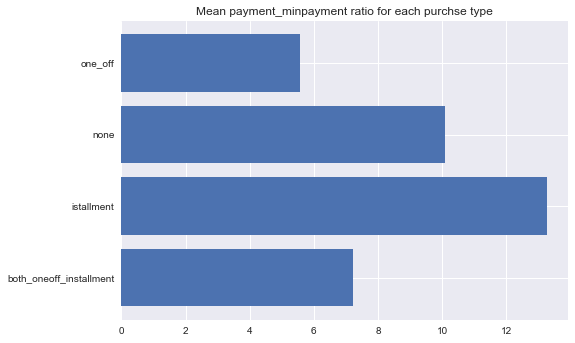

In [99]:
#plt.barh(left=np.arange(len(x)),bottom=x.values)
fig,ax=plt.subplots()
ax.barh(bottom=range(len(x)),width=x.values)
ax.set(yticks= np.arange(len(x)),yticklabels=x.index);
sns.plt.title('Mean payment_minpayment ratio for each purchse type')



In [100]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,...,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318,86.175173,88.977984,0.388884,9.059164
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,...,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331,180.508787,193.136115,0.389722,118.180526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,3.399375,0.000000,0.041494,0.913275
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,...,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,31.936667,0.000000,0.302720,2.032717
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,...,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000,97.228333,99.085196,0.717571,6.052729
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,...,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,15.909951,6840.528861


## 1. customers with installment purchases are paying dues 

---



In [101]:
credit[credit['purchase_type']=='n']

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpay


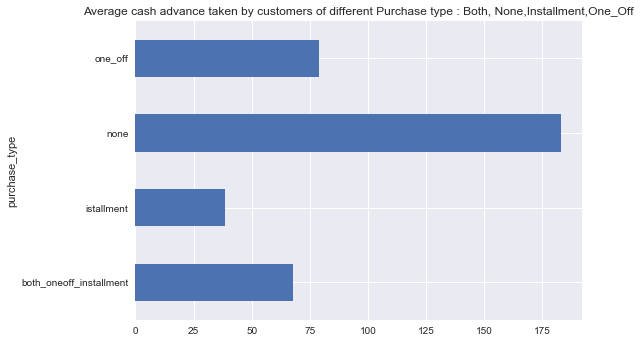

In [102]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

sns.plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

## 2. Customers who don't do either one-off or installment purchases take more cash on advance

---

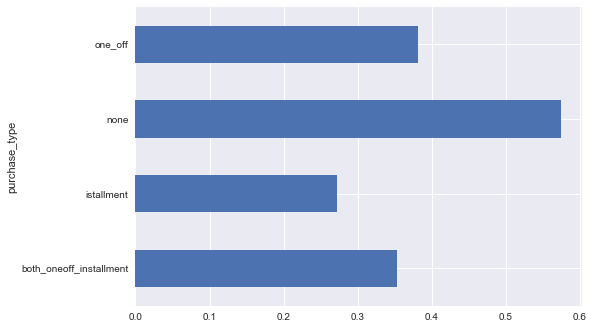

In [103]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

## 3. Customers with installment purchases have good credit score

---

In [104]:
# Original dataset with categorical column converted to number type.
cre_original=pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)

******
# c) Preparing for Machine learning
******

In [105]:
# creating Dummies for categorical variable
cr_pre['purchase_type']=credit.loc[:,'purchase_type']
pd.get_dummies(cr_pre['purchase_type'])

C:\Users\lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,both_oneoff_installment,istallment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,1,0,0
6,1,0,0,0
7,0,1,0,0
8,1,0,0,0
9,0,0,0,1


In [106]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'])],axis=1)

In [107]:

l=['purchase_type']

In [108]:
cr_dummy=cr_dummy.drop(l,axis=1)
cr_dummy.isnull().any()



BALANCE_FREQUENCY                   False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
Monthly_avg_purchase                False
Monthly_cash_advance                False
limit_usage                         False
payment_minpay                      False
both_oneoff_installment             False
istallment                          False
none                                False
one_off                             False
dtype: bool

In [109]:
cr_dummy.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,both_oneoff_installment,istallment,none,one_off
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.877271,592.437371,411.067645,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,86.175173,88.977984,0.388884,9.059164,0.309944,0.252514,0.228156,0.209385
std,0.236904,1659.887917,904.338115,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,180.508787,193.136115,0.389722,118.180526,0.462496,0.434479,0.419667,0.406893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.888889,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,3.399375,0.000000,0.041494,0.913275,0.000000,0.000000,0.000000,0.000000
50%,1.000000,38.000000,89.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,31.936667,0.000000,0.302720,2.032717,0.000000,0.000000,0.000000,0.000000
75%,1.000000,577.405000,468.637500,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,97.228333,99.085196,0.717571,6.052729,1.000000,1.000000,0.000000,0.000000
max,1.000000,40761.250000,22500.000000,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,4086.630833,3928.100980,15.909951,6840.528861,1.000000,1.000000,1.000000,1.000000


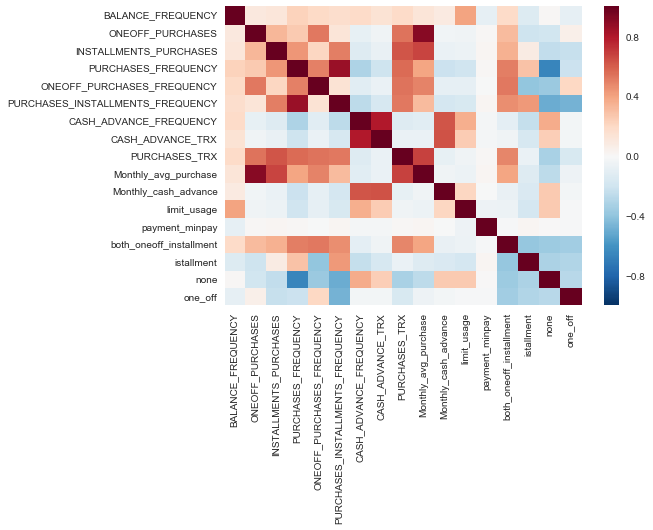

In [110]:
sns.heatmap(cr_dummy.corr())

<big>
- Heat map shows that many features are co-related so applying dimensionality reduction will help negating multi-colinearity in data
</big>


- Before applying PCA we will standardize data  to avoid effect of scale on our result. Centering and Scaling will make all features with equal weight.

# d). Standardrizing data 
- To put data on the same scale 

In [111]:
from sklearn.preprocessing import  StandardScaler



In [112]:
sc=StandardScaler()



In [157]:
cr_scaled=sc.fit_transform(cr_dummy)
cr_scaled_data=pd.DataFrame(cr_scaled,columns=cr_dummy.columns)
cr_scaled_data.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,both_oneoff_installment,istallment,none,one_off
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,1.209548e-14,3.916048e-15,2.275424e-15,-3.716084e-16,2.021052e-15,2.353921e-16,5.729495e-16,-7.151821e-16,-3.570713e-15,-3.041862e-15,-8.728152e-16,7.807225e-17,4.842495e-18,-3.752852e-15,8.733374e-15,-4.507133e-16,-2.274580e-15
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-3.703271e+00,-3.569340e-01,-4.545762e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.917959e-01,-4.774282e-01,-4.607266e-01,-9.979057e-01,-7.665959e-02,-6.701925e-01,-5.812208e-01,-5.436904e-01,-5.146250e-01
25%,4.904486e-02,-3.569340e-01,-4.545762e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.515646e-01,-4.585950e-01,-4.607266e-01,-8.914292e-01,-6.893135e-02,-6.701925e-01,-5.812208e-01,-5.436904e-01,-5.146250e-01
50%,5.180838e-01,-3.340396e-01,-3.561562e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.753489e-01,-4.760698e-01,-3.101767e-01,-3.004925e-01,-4.607266e-01,-2.211018e-01,-5.945853e-02,-6.701925e-01,-5.812208e-01,-5.436904e-01,-5.146250e-01
75%,5.180838e-01,-9.056763e-03,6.366321e-02,1.062211e+00,3.269728e-01,9.701506e-01,4.351492e-01,1.100739e-01,9.213645e-02,6.123679e-02,5.233499e-02,8.434381e-01,-2.544077e-02,1.492109e+00,1.720516e+00,-5.436904e-01,-5.146250e-01
max,5.180838e-01,2.420107e+01,2.442689e+01,1.269843e+00,2.673451e+00,1.599199e+00,6.820521e+00,1.754785e+01,1.381101e+01,2.216335e+01,1.987892e+01,3.982827e+01,5.780861e+01,1.492109e+00,1.720516e+00,1.839282e+00,1.943162e+00


# e) Applying PCA 

In [114]:
from sklearn.decomposition import PCA

In [115]:
var_ratio={}
for n in range(4,15):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

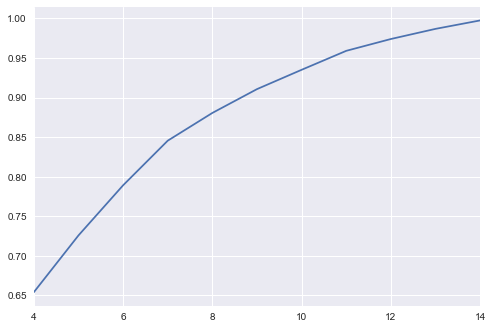

In [116]:
pd.Series(var_ratio).plot()

---
# Since 5 components are explaining about 87% variance so we select 5 components

---



In [158]:
pc_final=PCA(n_components=7).fit(cr_scaled)

reduced_cr=pc_final.fit_transform(cr_scaled)

In [159]:
col_list=cr_dummy.columns

In [160]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(7)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
BALANCE_FREQUENCY,0.081383,0.250454,0.165137,-0.481265,-0.221546,-0.279770,0.247824
ONEOFF_PURCHASES,0.268594,0.234655,-0.264622,0.299231,-0.039034,-0.216062,-0.017326
INSTALLMENTS_PURCHASES,0.301251,0.091941,0.150284,0.288944,-0.095317,-0.172192,-0.012892
PURCHASES_FREQUENCY,0.376263,-0.077029,0.195009,-0.225221,0.204665,0.040594,0.045414
ONEOFF_PURCHASES_FREQUENCY,0.277679,0.200445,-0.310394,-0.226082,0.120348,0.164076,0.014736
PURCHASES_INSTALLMENTS_FREQUENCY,0.330793,-0.116507,0.397819,-0.075546,0.064311,0.042265,0.008043
CASH_ADVANCE_FREQUENCY,-0.189016,0.423331,0.207705,0.021559,0.228217,0.028098,-0.020189
CASH_ADVANCE_TRX,-0.144620,0.403091,0.228019,0.053105,0.362967,0.061731,-0.063712
PURCHASES_TRX,0.357781,0.167436,0.019712,0.110327,-0.033497,-0.055573,0.006497
Monthly_avg_purchase,0.335246,0.222329,-0.142329,0.353670,-0.062017,-0.241221,-0.019721


In [161]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(7)])

PC_0    0.291886
PC_1    0.167998
PC_2    0.118383
PC_3    0.075565
PC_4    0.071810
PC_5    0.063409
PC_6    0.056420
dtype: float64

In [121]:
type(cr_pca)

sklearn.decomposition.pca.PCA

# f). Clustering 

---
<big>

Based on the intuition on type of purchases made by customers and their distinctive behavior exhibited based on the purchase_type (as visualized above in Insights from KPI) , I am starting with 4 clusters.

</big>

---

In [122]:
from sklearn.cluster import KMeans


In [162]:
km_4=KMeans(n_clusters=4,random_state=123)


In [163]:
km_4.fit(reduced_cr)
km_4.labels_


array([3, 1, 0, ..., 3, 1, 0])

In [164]:
pd.Series(km_4.labels_).value_counts()


2    2652
1    2273
3    2206
0    1819
dtype: int64

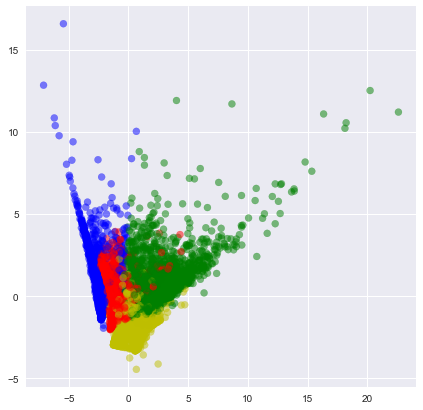

In [165]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)



In [127]:
cr_dummy.dtypes

BALANCE_FREQUENCY                   float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
Monthly_avg_purchase                float64
Monthly_cash_advance                float64
limit_usage                         float64
payment_minpay                      float64
both_oneoff_installment               uint8
istallment                            uint8
none                                  uint8
one_off                               uint8
dtype: object

In [166]:
df_pair_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(7)])

In [167]:
df_pair_plot['Cluster']=km_4.labels_

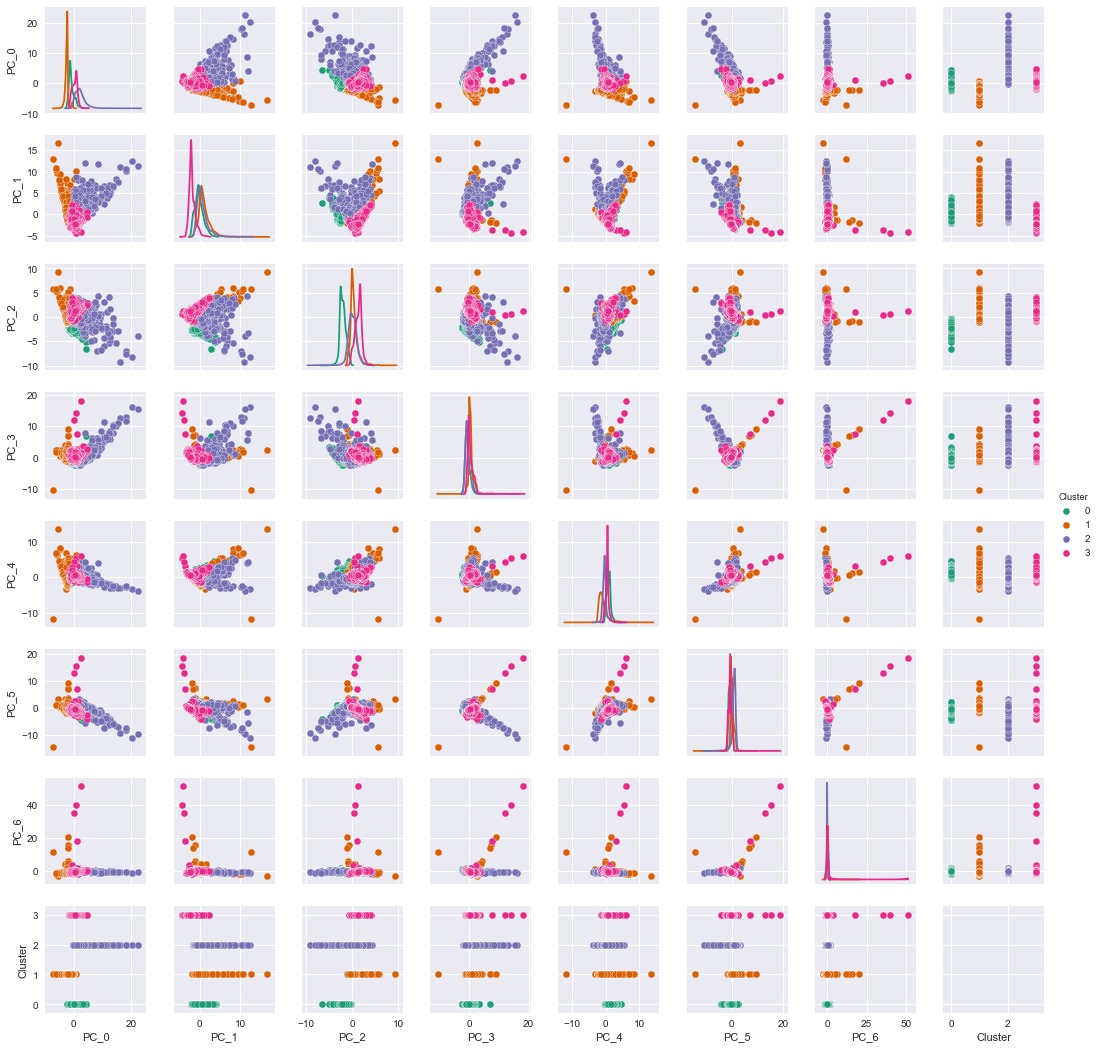

In [168]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

## It shows that first two components are able to indentify clusters

In [169]:
# Key performace variable selection . here i am dropping varibales which are used in derving new KPI
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','istallment','one_off','none','CREDIT_LIMIT']

In [170]:
cr_pre.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.877271,592.437371,411.067645,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,86.175173,88.977984,0.388884,9.059164
std,0.236904,1659.887917,904.338115,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,180.508787,193.136115,0.389722,118.180526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.888889,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,3.399375,0.000000,0.041494,0.913275
50%,1.000000,38.000000,89.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,31.936667,0.000000,0.302720,2.032717
75%,1.000000,577.405000,468.637500,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,97.228333,99.085196,0.717571,6.052729
max,1.000000,40761.250000,22500.000000,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,4086.630833,3928.100980,15.909951,6840.528861


In [217]:
# Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

#cluster_df_4=pd.concat([cr_scaled_data,pd.Series(km_4.labels_,name='Cluster_4')],axis=1)


In [218]:
cluster_df_4.head()


,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_installment,istallment,one_off,none,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,3
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,1
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,0
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,0
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,0


In [219]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4




Cluster_4,0,1,2,3
PURCHASES_TRX,6.521715,0.640123,34.789216,11.819583
Monthly_avg_purchase,66.398263,4.341761,203.773520,45.427543
Monthly_cash_advance,59.320995,213.011554,54.440970,27.151111
limit_usage,0.366225,0.580735,0.347284,0.259899
CASH_ADVANCE_TRX,2.133040,7.653322,2.259427,0.820036
payment_minpay,5.547681,9.448131,7.455052,13.482269
both_oneoff_installment,0.011545,0.048394,0.994721,0.002267
istallment,0.000000,0.024197,0.001508,0.997733
one_off,0.988455,0.029037,0.003771,0.000000
none,0.000000,0.898372,0.000000,0.000000


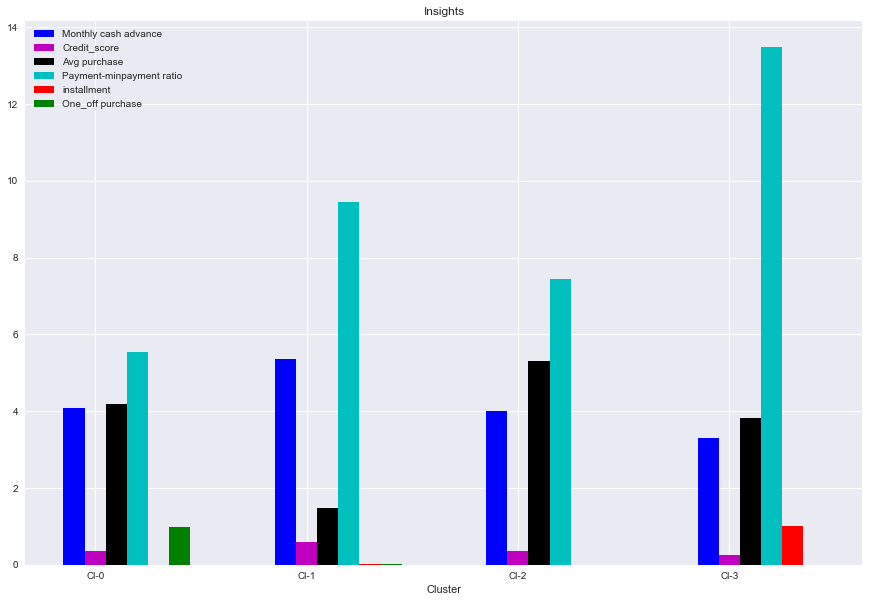

In [220]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['istallment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

## ---
** Insights**

# Clusters are clearly distinguishing behavior within customers

---

<big>

- 
- Cluster 3 customers have best credit score and  are paying dues and are doing maximum installment purchases. taking less advance on cash.But thier average purchases are little less. *** This group is about 25% of the total customer base ***



- Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. *** This group is about 30% of the total customer base ***
 

 
- cluster 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor credit_score & doing no very less purchase transaction. *** This group is about 25% of the total customer base ***



- Cluster 0 customers are doing maximum One_Off transactions  and  least payment ratio. *** This group is about 20% of the total customer base ***





---



# Findings through clustering is validating Insights dervied from KPI. (as shown above in Insights from KPI
---

In [175]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print s,'\n'

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print "Cluster -4 ",'\n'
print pd.concat([pd.Series(s.values,name='Size'),per],axis=1),'\n'


Cluster_4   
0          0    1819
1          1    2273
2          2    2652
3          3    2206
Name: Cluster_4, dtype: int64 

Cluster -4  

   Size  Percentage
0  1819   20.324022
1  2273   25.396648
2  2652   29.631285
3  2206   24.648045 



# Finding behaviour with 5 Clusters:
---

In [225]:
reduced_cr.shape
cr_scaled.shape

(8950L, 17L)

In [176]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_cr)
km_5.labels_

array([1, 4, 0, ..., 1, 4, 0])

In [177]:
pd.Series(km_5.labels_).value_counts()

3    2533
4    2206
1    2202
0    1811
2     198
dtype: int64

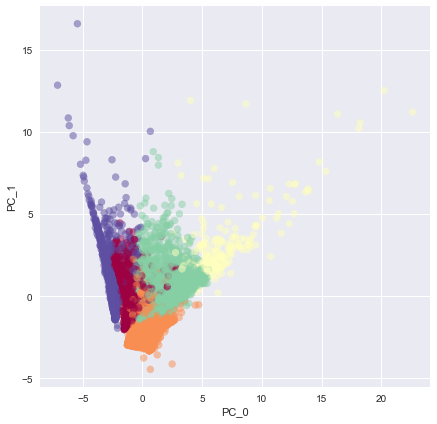

In [178]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [193]:
cluster_df_5=pd.concat([cre_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [195]:
# Finding Mean of features for each cluster
cluster_df_5=cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

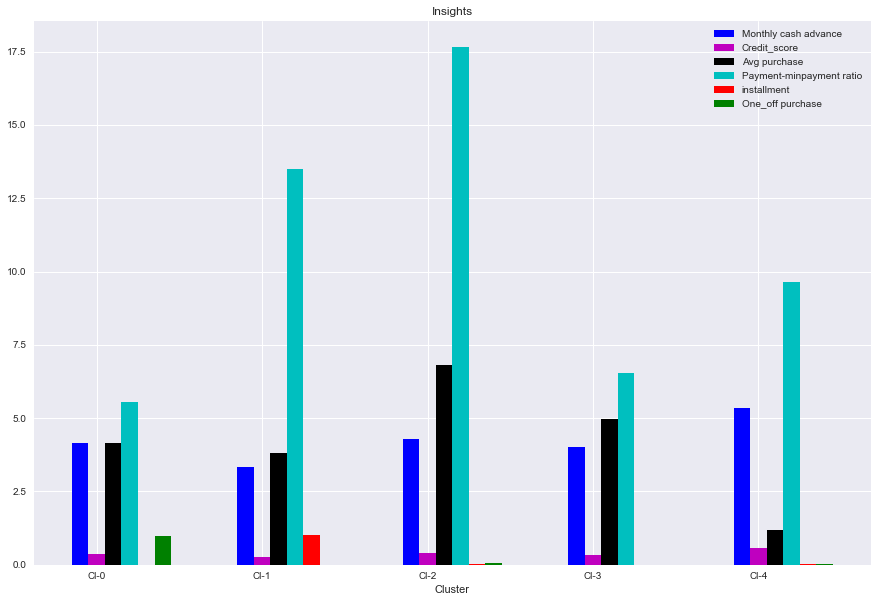

In [196]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_df_5.columns))

cash_advance=np.log(cluster_df_5.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_df_5.loc['limit_usage',:].values)
purchase= np.log(cluster_df_5.loc['Monthly_avg_purchase',:].values)
payment=cluster_df_5.loc['payment_minpay',:].values
installment=cluster_df_5.loc['istallment',:].values
one_off=cluster_df_5.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4'))
plt.legend()

# With 5 clusters : 



- Cluster 0 and Cluster 3 are behaving similar in terms of Credit_limit and have cash advance transactions is on higher side.


---
 
<big>

*** So we don't have quite distinguishable characteristics with 5 clusters, ***

In [181]:

s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print '\n',s1


Cluster_5   
0          0    1811
1          1    2202
2          2     198
3          3    2533
4          4    2206
Name: Cluster_5, dtype: int64


In [182]:
# percentage of each cluster


print "Cluster-5",'\n'
per_5=pd.Series((s1.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
print pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1)

Cluster-5 

   Size  Percentage
0  1811   20.234637
1  2202   24.603352
2   198    2.212291
3  2533   28.301676
4  2206   24.648045


# Finding behavior with 6 clusters

In [183]:
km_6=KMeans(n_clusters=6).fit(reduced_cr)
km_6.labels_

array([0, 5, 1, ..., 0, 5, 1])

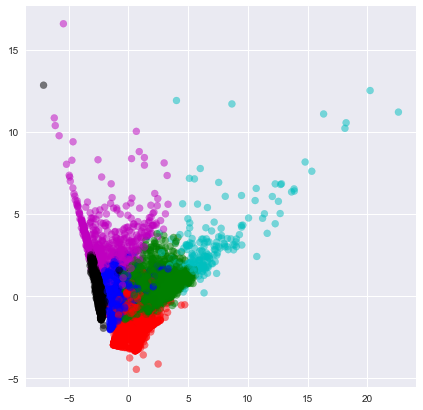

In [184]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)


In [197]:
cluster_df_6=pd.concat([cre_original[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [198]:
six_cluster=cluster_df_6.groupby('Cluster_6')\
.apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,11.731034,6.662398,28.027072,113.308901,9.798623,0.033970
Monthly_avg_purchase,44.777906,64.333248,146.524957,925.786344,59.045147,0.220005
Monthly_cash_advance,21.789555,44.232974,33.217728,65.768363,546.280078,139.735761
limit_usage,0.255533,0.358722,0.332492,0.391259,0.613775,0.572608
CASH_ADVANCE_TRX,0.670345,1.614668,1.429821,2.193717,20.829604,4.719214
payment_minpay,13.622172,5.632982,6.672287,17.818416,5.781627,10.080270
both_oneoff_installment,0.000000,0.001746,0.999584,0.905759,0.321859,0.005839
istallment,1.000000,0.000000,0.000000,0.031414,0.120482,0.004777
one_off,0.000000,0.998254,0.000416,0.062827,0.251291,0.000000
none,0.000000,0.000000,0.000000,0.000000,0.306368,0.989384


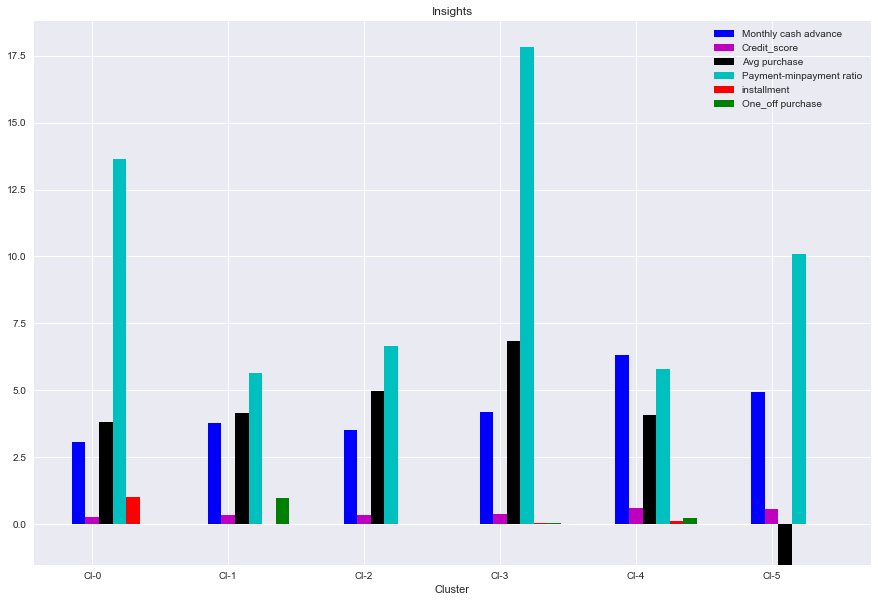

In [216]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(six_cluster.loc['limit_usage',:].values)
purchase= np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['istallment',:].values
one_off=six_cluster.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

## Insights with  6 clusters

- Here also groups are overlapping .
     - Cl-0 and Cl-2 behaving same 

In [200]:
s2=cluster_df_6.groupby('Cluster_6').apply(lambda x: x['Cluster_6'].value_counts())
print '\n',s2


Cluster_6   
0          0    2175
1          1    1718
2          2    2401
3          3     191
4          4     581
5          5    1884
Name: Cluster_6, dtype: int64


In [201]:
per_6=pd.Series((s2.values.astype('float')/ cluster_df_6.shape[0])*100,name='Percentage')
print pd.concat([pd.Series(s2.values,name='Size'),per_6],axis=1)

   Size  Percentage
0  2175   24.301676
1  1718   19.195531
2  2401   26.826816
3   191    2.134078
4   581    6.491620
5  1884   21.050279



---


# Checking performance metrics for Kmeans
- I am validating performance with 2 metrics Calinski harabaz and Silhouette score

In [151]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score



In [222]:
score={}
score_c={}
for n in range(3,15):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_cr)
    score_c[n]=calinski_harabaz_score(reduced_cr,km_score.labels_)
    score[n]=silhouette_score(reduced_cr,km_score.labels_)

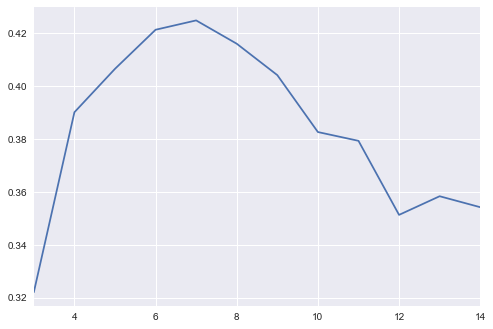

In [221]:
pd.Series(score).plot()

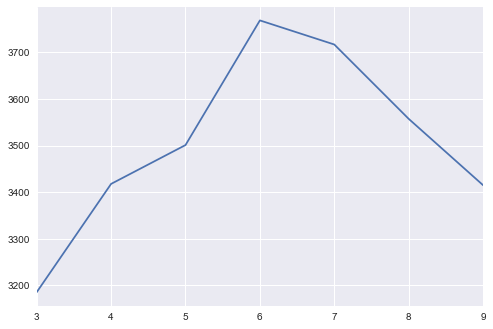

In [154]:
pd.Series(score_c).plot()

## Performance metrics also suggest that  K-means with 4 cluster is able to show distinguished characteristics of each cluster.




<big>
*** Insights with 4 Clusters ***



---

<big>



- Cluster 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. *** This group is about 31% of the total customer base ***
 

 
- cluster 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. *** This group is about 23% of the total customer base ***



- Cluster 0 customers are doing maximum One_Off transactions  and  least payment ratio and credit_score on lower side *** This group is about 21% of the total customer base ***



- Cluster 3 customers have maximum credit score and  are paying dues and are doing maximum installment purchases. *** This group is about 25% of the total customer base ***


---



# Marketing Strategy Suggested:

## a. Group 2
   - They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score )
       --    we can increase credit limit or can lower down interest rate
       --    Can be given premium card /loyality cards to increase transactions
## b. Group 1
   - They have poor credit score and taking only cash on advance. We can target them by providing  less interest rate on purchase transaction
   
## c. Group 0
   - This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.
   
## d. Group 3
  - This group is performing best among all as cutomers are maintaining good credit score and paying dues on time.
      -- Giving rewards point will make them perform more purchases.
       